<a href="https://colab.research.google.com/github/Isidor91/Bitcoin-Price-Prediction-In-Next-30-Days/blob/main/Bitcoin_Price_Prediction_For_Next_30_Days_Using_Simple_Machine_Learning_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[All Right Reserved Isio Technologies LLC](https://isiotech.com)**

In [1]:
pip install pandas numpy scikit-learn matplotlib yfinance

In [3]:
import yfinance as yf
import pandas as pd

# Fetch historical Bitcoin price data
btc_data = yf.download('BTC-USD', start='2024-07-13', end='2024-08-10', interval='1d')
btc_data.reset_index(inplace=True)

# Display the first few rows of the data
print(btc_data.head())

[*********************100%%**********************]  1 of 1 completed

        Date          Open          High           Low         Close  \
0 2024-07-13  57908.738281  59787.078125  57796.441406  59231.953125   
1 2024-07-14  59225.250000  61329.527344  59225.250000  60787.792969   
2 2024-07-15  60815.457031  64870.152344  60704.929688  64870.152344   
3 2024-07-16  64784.417969  65354.339844  62487.968750  65097.148438   
4 2024-07-17  65091.832031  66066.734375  63896.085938  64118.792969   

      Adj Close       Volume  
0  59231.953125  17080061806  
1  60787.792969  22223416061  
2  64870.152344  38094526099  
3  65097.148438  41617346768  
4  64118.792969  32525071311  


In [4]:
# Feature Engineering
btc_data['Date'] = btc_data['Date'].map(pd.Timestamp.timestamp)
btc_data = btc_data[['Date', 'Close']]  # Using 'Close' price for prediction

# Create features and labels
X = btc_data['Date'].values.reshape(-1, 1)  # Features
y = btc_data['Close'].values  # Labels


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
import numpy as np
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Create and train a model (example using Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the next 30 days
last_date = datetime.fromtimestamp(btc_data['Date'].iloc[-1])
future_dates = np.array([(last_date + timedelta(days=i)) for i in range(1, 31)]).reshape(-1, 1)
future_dates_timestamps = np.array([pd.Timestamp(date).timestamp() for date in future_dates.flatten()]).reshape(-1, 1) # Convert datetime to timestamps

# Make predictions
predictions = model.predict(future_dates_timestamps) # Use the trained model for predictions

# Create a DataFrame for future dates and their predicted prices
predicted_prices = pd.DataFrame({
    'Date': [date for date in future_dates.flatten()], # No need to convert from timestamp here
    'Predicted Price': predictions
})

print(predicted_prices)

         Date  Predicted Price
0  2024-08-10     60562.748891
1  2024-08-11     60336.652730
2  2024-08-12     60110.556568
3  2024-08-13     59884.460406
4  2024-08-14     59658.364245
5  2024-08-15     59432.268083
6  2024-08-16     59206.171921
7  2024-08-17     58980.075760
8  2024-08-18     58753.979598
9  2024-08-19     58527.883436
10 2024-08-20     58301.787274
11 2024-08-21     58075.691113
12 2024-08-22     57849.594951
13 2024-08-23     57623.498789
14 2024-08-24     57397.402628
15 2024-08-25     57171.306466
16 2024-08-26     56945.210304
17 2024-08-27     56719.114143
18 2024-08-28     56493.017981
19 2024-08-29     56266.921819
20 2024-08-30     56040.825658
21 2024-08-31     55814.729496
22 2024-09-01     55588.633334
23 2024-09-02     55362.537173
24 2024-09-03     55136.441011
25 2024-09-04     54910.344849
26 2024-09-05     54684.248687
27 2024-09-06     54458.152526
28 2024-09-07     54232.056364
29 2024-09-08     54005.960202


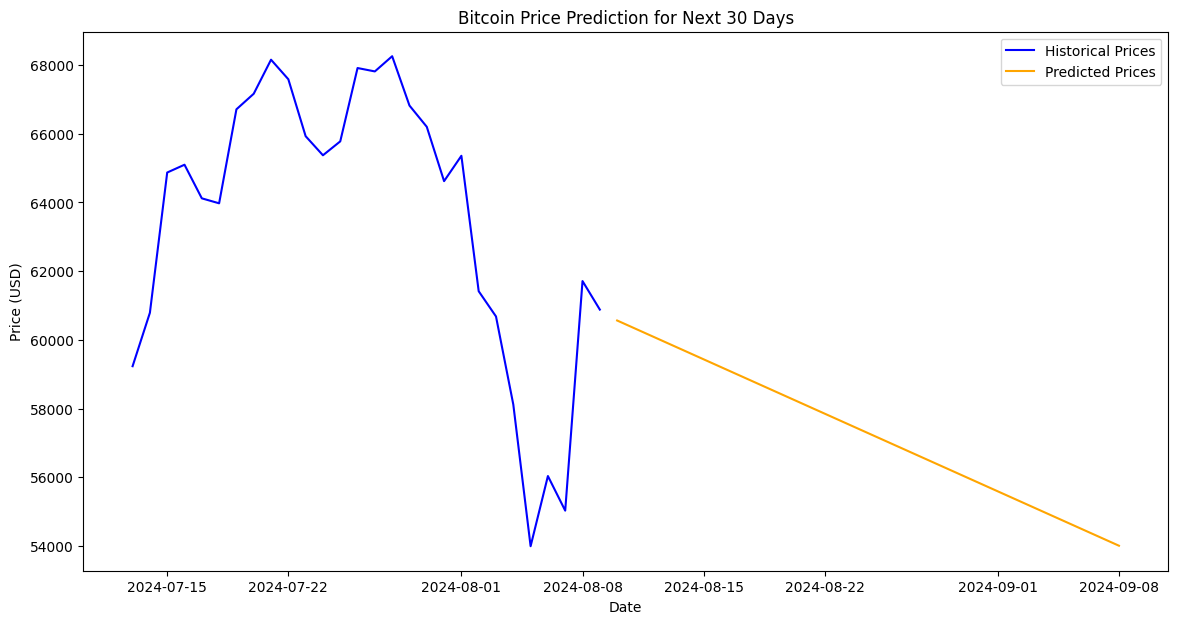

In [12]:
import matplotlib.pyplot as plt

# Plot historical prices
plt.figure(figsize=(14, 7))
# Convert timestamps back to datetime objects for plotting
plt.plot(pd.to_datetime(btc_data['Date'], unit='s'), btc_data['Close'], label='Historical Prices', color='blue')  # Convert 'Date' back to datetime
plt.plot(predicted_prices['Date'], predicted_prices['Predicted Price'], label='Predicted Prices', color='orange')

plt.title('Bitcoin Price Prediction for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

""" This is a basic framework for a Bitcoin price prediction app.
For better results, you may explore more advanced models like LSTM or ARIMA, feature scaling, and hyperparameter tuning.
Additionally, consider evaluating the model's performance using metrics such as RMSE or MAE.

Note

Keep in mind that financial predictions are inherently risky and can be influenced by countless unpredictable factors.
Always do your own research and use caution when trading."""
